In [22]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Setting up the figures' configurations
sns.set()
sns.set_style('darkgrid')
sns.set_palette('husl')

In [24]:
# Taking one interpolation data
file = 'Result/Experiment 1 & 3 Result.csv'
column_names = ['Time', 'p_x', 'p_y', 'p_z']
df_5_pos_raw = pd.read_csv(file, usecols=[0, 1, 2, 3], names=column_names)
print(df_5_pos_raw)

      Time        p_x        p_y        p_z
0    2.973  10.000000  20.000000  40.000000
1    3.002  10.000000  20.000000  40.000000
2    3.022  10.000042  20.000025  40.000027
3    3.042  10.000293  20.000175  40.000175
4    3.063  10.000981  20.000590  40.000587
..     ...        ...        ...        ...
242  7.929  59.998620  49.999170  69.999170
243  7.947  59.999382  49.999626  69.999626
244  7.965  59.999855  49.999916  69.999916
245  7.983  60.000000  50.000000  70.000000
246  8.002  60.000000  50.000000  70.000000

[247 rows x 4 columns]


In [25]:
# Creating synthetic data for initial position
interval = df_5_pos_raw.iloc[1, 0] - df_5_pos_raw.iloc[0, 0]
time_begin = np.arange(0, df_5_pos_raw.iloc[0, 0], interval)
position_begin = pd.concat([df_5_pos_raw.iloc[[0], :]] * time_begin.shape[0], ignore_index=True)
position_begin['Time'] = time_begin
print(position_begin)

      Time   p_x   p_y   p_z
0    0.000  10.0  20.0  40.0
1    0.029  10.0  20.0  40.0
2    0.058  10.0  20.0  40.0
3    0.087  10.0  20.0  40.0
4    0.116  10.0  20.0  40.0
..     ...   ...   ...   ...
98   2.842  10.0  20.0  40.0
99   2.871  10.0  20.0  40.0
100  2.900  10.0  20.0  40.0
101  2.929  10.0  20.0  40.0
102  2.958  10.0  20.0  40.0

[103 rows x 4 columns]


In [26]:
# Creating synthetic data for final position
time_end = np.arange(df_5_pos_raw.iloc[-1, 0] + interval, 11.0 + interval, interval)
position_end = pd.concat([df_5_pos_raw.iloc[[-1], :]] * time_end.shape[0], ignore_index=True)
position_end['Time'] = time_end
print(position_end)

       Time   p_x   p_y   p_z
0     8.031  60.0  50.0  70.0
1     8.060  60.0  50.0  70.0
2     8.089  60.0  50.0  70.0
3     8.118  60.0  50.0  70.0
4     8.147  60.0  50.0  70.0
..      ...   ...   ...   ...
99   10.902  60.0  50.0  70.0
100  10.931  60.0  50.0  70.0
101  10.960  60.0  50.0  70.0
102  10.989  60.0  50.0  70.0
103  11.018  60.0  50.0  70.0

[104 rows x 4 columns]


In [27]:
# Calculating derivatives

def velocity(df_pos):
    velocity_cols = ['Time', 'v_x', 'v_y', 'v_z']
    df_velocity = pd.DataFrame(columns=velocity_cols)
    for col_index in range(len(velocity_cols)-1):
        delta_v = np.diff(df_pos.iloc[:, col_index + 1]) / np.diff(df_pos.iloc[:, 0])
        df_velocity[velocity_cols[col_index+ 1]] = delta_v
    df_velocity['Time'] = np.array([(df_pos.iloc[i, 0] + df_pos.iloc[i + 1, 0]) / 2 for i in range(df_pos.shape[0] - 1)])
    return df_velocity
        
def acceleration(df_vel):
    acceleration_cols = ['Time', 'a_x', 'a_y', 'a_z']
    df_acceleration = pd.DataFrame(columns=acceleration_cols)
    for col_index in range(len(acceleration_cols)-1):
        delta_a = np.diff(df_vel.iloc[:, col_index + 1]) / np.diff(df_vel.iloc[:, 0])
        df_acceleration[acceleration_cols[col_index+1]] = delta_a
    df_acceleration['Time'] = np.array([(df_vel.iloc[i, 0] + df_vel.iloc[i + 1, 0]) / 2 for i in range(df_vel.shape[0] - 1)])
    return df_acceleration


## Assignment 1

In [28]:
df_5_pos = pd.concat([position_begin, df_5_pos_raw, position_end], ignore_index=True)
print(df_5_pos)

       Time   p_x   p_y   p_z
0     0.000  10.0  20.0  40.0
1     0.029  10.0  20.0  40.0
2     0.058  10.0  20.0  40.0
3     0.087  10.0  20.0  40.0
4     0.116  10.0  20.0  40.0
..      ...   ...   ...   ...
449  10.902  60.0  50.0  70.0
450  10.931  60.0  50.0  70.0
451  10.960  60.0  50.0  70.0
452  10.989  60.0  50.0  70.0
453  11.018  60.0  50.0  70.0

[454 rows x 4 columns]


In [29]:
df_1_pos_raw = pd.read_csv(file, usecols=[0, 4, 5, 6], names=column_names)
df_1_pos = pd.concat([position_begin, df_1_pos_raw, position_end], ignore_index=True)
print(df_1_pos)

       Time   p_x   p_y   p_z
0     0.000  10.0  20.0  40.0
1     0.029  10.0  20.0  40.0
2     0.058  10.0  20.0  40.0
3     0.087  10.0  20.0  40.0
4     0.116  10.0  20.0  40.0
..      ...   ...   ...   ...
449  10.902  60.0  50.0  70.0
450  10.931  60.0  50.0  70.0
451  10.960  60.0  50.0  70.0
452  10.989  60.0  50.0  70.0
453  11.018  60.0  50.0  70.0

[454 rows x 4 columns]


In [30]:
fig_name_x = 'Assignment 1/result_assignmentx.png'
fig_name_y = 'Assignment 1/result_assignmenty.png'
fig_name_z = 'Assignment 1/result_assignmentz.png'

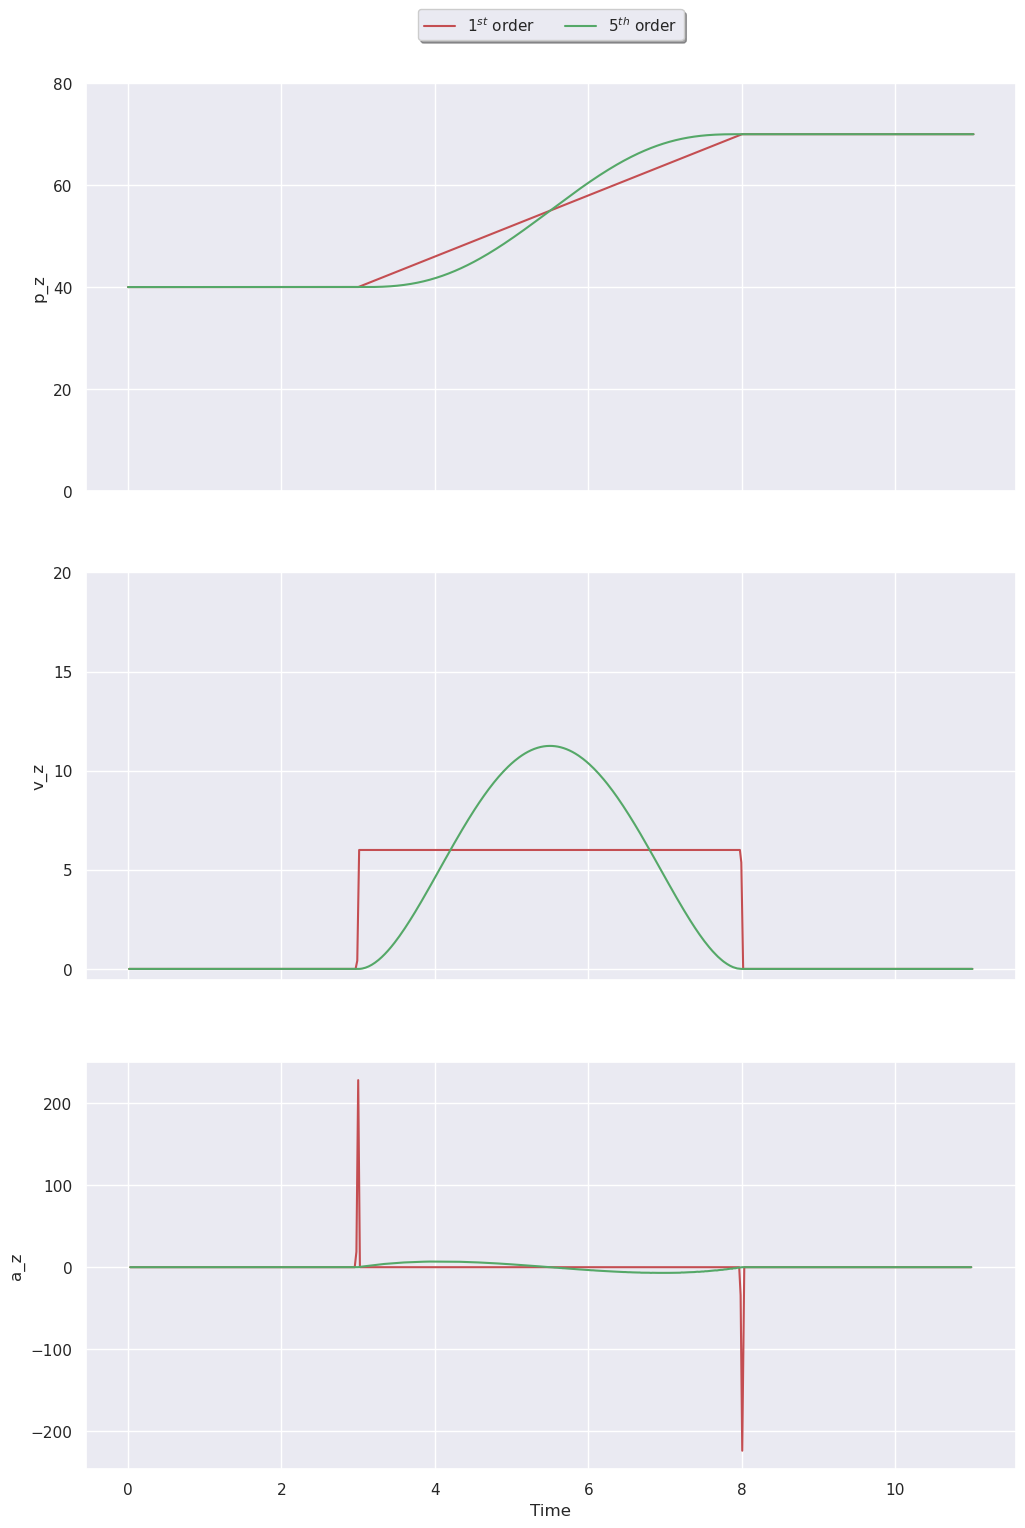

In [31]:
# Plot position, velocity, and acceleration
dfs, c = (df_1_pos, df_5_pos), ('r', 'g')
AXIS = 3 # X, Y, Z
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
legend = [r'$1^{st}$ order', r'$5^{th}$ order']

for i in range(len(dfs)):
    df = dfs[i]
    axes[0].plot(df.iloc[:, 0], df.iloc[:, AXIS], c=c[i])
    df_velocity = velocity(df)
    axes[1].plot(df_velocity.iloc[:, 0], df_velocity.iloc[:, AXIS], c=c[i])
    df_acceleration = acceleration(df_velocity)
    axes[2].plot(df_acceleration.iloc[:, 0], df_acceleration.iloc[:, AXIS], c=c[i])

axes[0].legend(legend, loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=2)
axes[0].set_ylabel(column_names[AXIS])
axes[0].set_yticks([20 * i for i in range(5)])
axes[1].set_ylabel(df_velocity.columns[AXIS])
axes[1].set_yticks([5 * i for i in range(5)])
axes[2].set_ylabel(df_acceleration.columns[AXIS])
axes[2].set_xlabel('Time')

fig.savefig(fig_name_z, bbox_inches='tight')
plt.show()

In [32]:
fig_name_x_a = 'Assignment 1/result_assignment1_accelerationx.png'
fig_name_y_a = 'Assignment 1/result_assignment1_accelerationy.png'
fig_name_z_a = 'Assignment 1/result_assignment1_accelerationz.png'

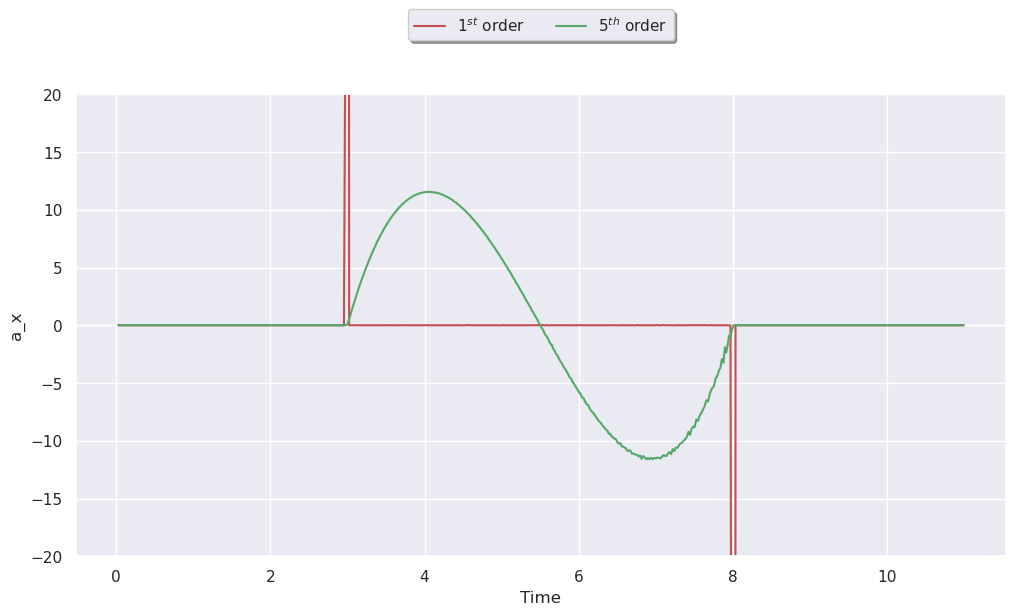

In [33]:
# Plot only the acceleration
dfs, c = (df_1_pos, df_5_pos), ('r', 'g')
AXIS = 1 # X, Y, Z
fig, ax = plt.subplots(figsize=(12, 6))
legend = [r'$1^{st}$ order', r'$5^{th}$ order']

for i in range(len(dfs)):
    df_acceleration = acceleration(velocity(dfs[i]))
    ax.plot(df_acceleration.iloc[:, 0], df_acceleration.iloc[:, AXIS], c=c[i])

ax.legend(legend, loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=2)
ax.set_ylabel(df_acceleration.columns[AXIS])
ax.set_xlabel('Time')
ax.set_ylim(-20, 20)
ax.set_yticks([5 * i for i in range(-4, 5)])

fig.savefig(fig_name_x_a, bbox_inches='tight')
plt.show()

## Assignment 2

In [34]:
file_circle = 'Result/Experiment 2 Result.csv'
fig_circle = 'Assignment 2/Circle path.png'

In [35]:
column_names = ['Time', 'p_x', 'p_y', 'p_z']
df_circle = pd.read_csv(file_circle, usecols=[0, 1, 2, 3], names=column_names)
print(df_circle)

       Time   p_x   p_y        p_z
0     6.005  80.0  50.0  40.000000
1     6.024  80.0  50.0  40.000206
2     6.041  80.0  50.0  40.001026
3     6.057  80.0  50.0  40.002747
4     6.076  80.0  50.0  40.006470
..      ...   ...   ...        ...
293  10.947  80.0  50.0  39.997760
294  10.963  80.0  50.0  39.999190
295  10.979  80.0  50.0  39.999820
296  10.995  80.0  50.0  39.999820
297  11.011  80.0  50.0  40.000000

[298 rows x 4 columns]


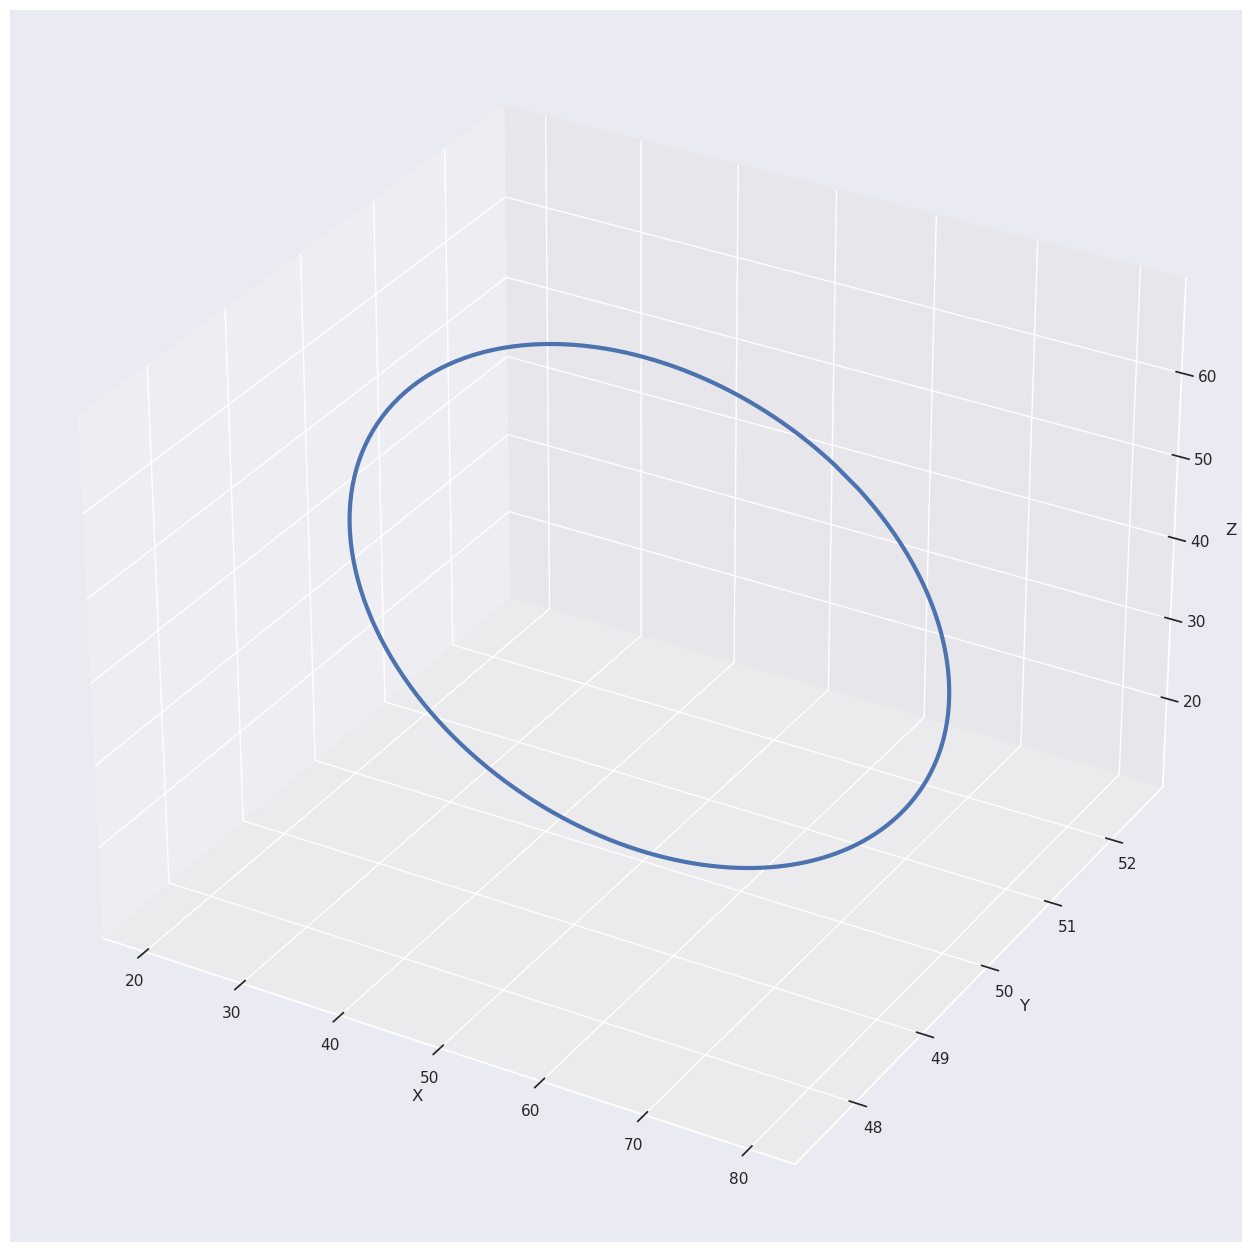

In [36]:
# Plot the path
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(projection='3d')

ax.plot(df_circle['p_x'], df_circle['p_y'], df_circle['p_z'], linewidth=3, c='b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.savefig(fig_circle, bbox_inches='tight')
plt.show()

## Assignment 3

In [37]:
fig_name_x = 'Assignment 3/result_assignmentx.png'
fig_name_y = 'Assignment 3/result_assignmenty.png'
fig_name_z = 'Assignment 3/result_assignmentz.png'

In [38]:
df_3_pos_raw = pd.read_csv(file, usecols=[0, 7, 8, 9], names=column_names)
df_3_pos = pd.concat([position_begin, df_3_pos_raw, position_end], ignore_index=True)
print(df_3_pos)

       Time   p_x   p_y   p_z
0     0.000  10.0  20.0  40.0
1     0.029  10.0  20.0  40.0
2     0.058  10.0  20.0  40.0
3     0.087  10.0  20.0  40.0
4     0.116  10.0  20.0  40.0
..      ...   ...   ...   ...
449  10.902  60.0  50.0  70.0
450  10.931  60.0  50.0  70.0
451  10.960  60.0  50.0  70.0
452  10.989  60.0  50.0  70.0
453  11.018  60.0  50.0  70.0

[454 rows x 4 columns]


In [39]:
df_t_pos_raw = pd.read_csv(file, usecols=[0, 10, 11, 12], names=column_names)
df_t_pos = pd.concat([position_begin, df_t_pos_raw, position_end], ignore_index=True)
print(df_t_pos)

       Time   p_x   p_y   p_z
0     0.000  10.0  20.0  40.0
1     0.029  10.0  20.0  40.0
2     0.058  10.0  20.0  40.0
3     0.087  10.0  20.0  40.0
4     0.116  10.0  20.0  40.0
..      ...   ...   ...   ...
449  10.902  60.0  50.0  70.0
450  10.931  60.0  50.0  70.0
451  10.960  60.0  50.0  70.0
452  10.989  60.0  50.0  70.0
453  11.018  60.0  50.0  70.0

[454 rows x 4 columns]


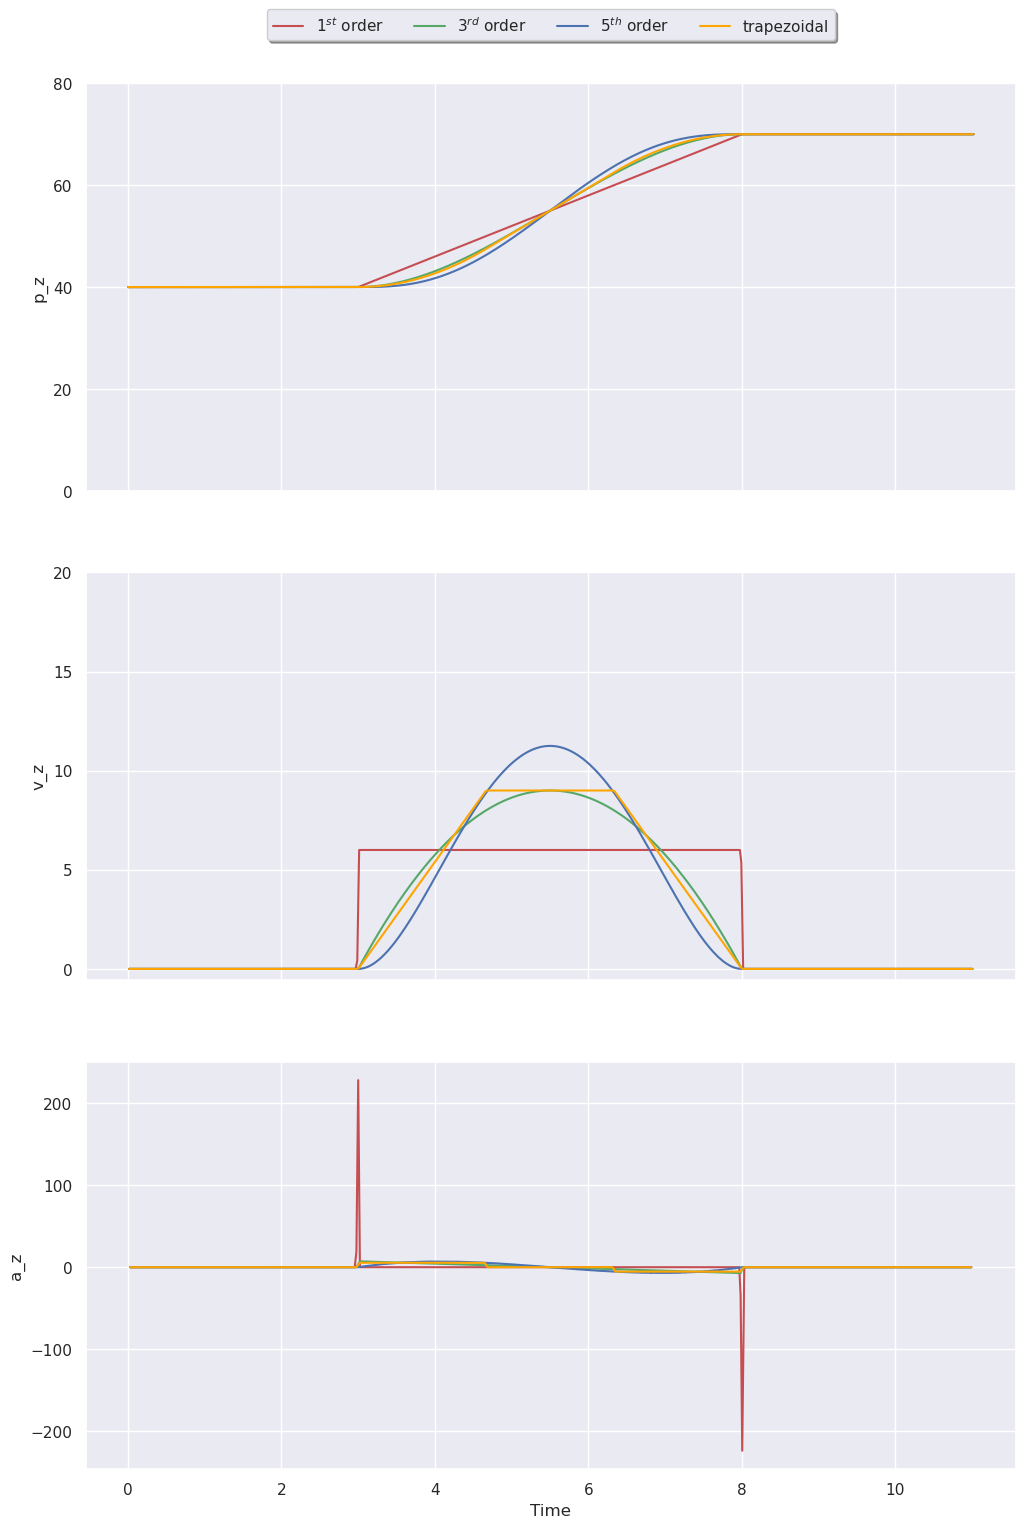

In [40]:
# Plot the position, velocity, and acceleration
dfs, c = (df_1_pos, df_3_pos, df_5_pos, df_t_pos), ('r', 'g', 'b', 'orange')
AXIS = 3 # X, Y, Z
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
legend = [r'$1^{st}$ order', r'$3^{rd}$ order', r'$5^{th}$ order', 'trapezoidal']

for i in range(len(dfs)):
    df = dfs[i]
    axes[0].plot(df.iloc[:, 0], df.iloc[:, AXIS], c=c[i])
    df_velocity = velocity(df)
    axes[1].plot(df_velocity.iloc[:, 0], df_velocity.iloc[:, AXIS], c=c[i])
    df_acceleration = acceleration(df_velocity)
    axes[2].plot(df_acceleration.iloc[:, 0], df_acceleration.iloc[:, AXIS], c=c[i])

axes[0].legend(legend, loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=4)
axes[0].set_ylabel(column_names[AXIS])
axes[0].set_yticks([20 * i for i in range(5)])
axes[1].set_ylabel(df_velocity.columns[AXIS])
axes[1].set_yticks([5 * i for i in range(5)])
axes[2].set_ylabel(df_acceleration.columns[AXIS])
axes[2].set_xlabel('Time')

fig.savefig(fig_name_z, bbox_inches='tight')

plt.show()

In [41]:
fig_name_x_acc = 'Assignment 3/result_assignmentx_acc.png'
fig_name_y_acc = 'Assignment 3/result_assignmenty_acc.png'
fig_name_z_acc = 'Assignment 3/result_assignmentz_acc.png'

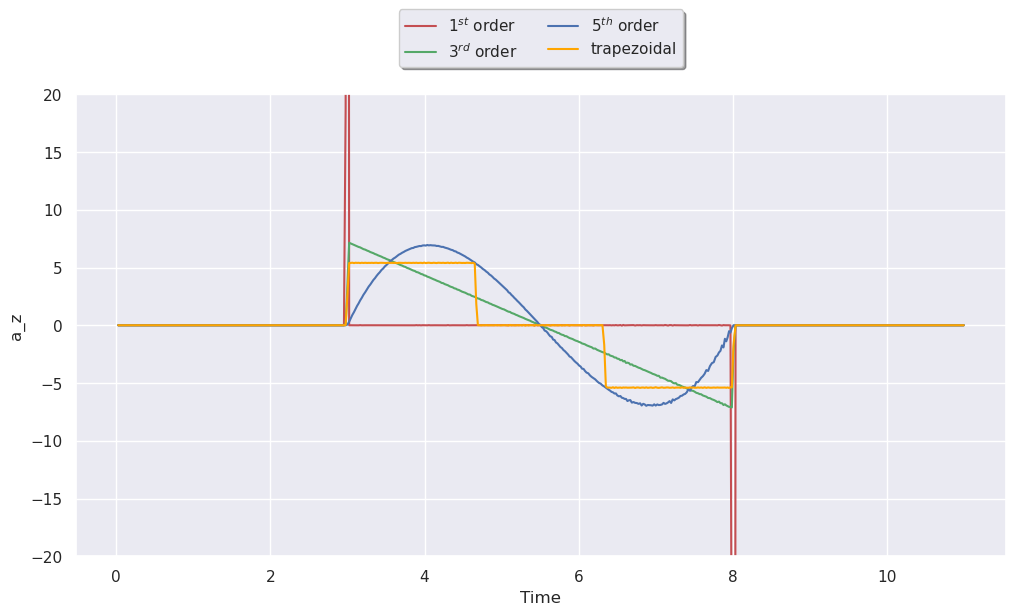

In [42]:
# Plot only the acceleration
dfs, c = (df_1_pos, df_3_pos, df_5_pos, df_t_pos), ('r', 'g', 'b', 'orange')
AXIS = 3 # X, Y, Z
fig, ax = plt.subplots(figsize=(12, 6))
legend = [r'$1^{st}$ order', r'$3^{rd}$ order', r'$5^{th}$ order', 'trapezoidal']

for i in range(len(dfs)):
    df_acceleration = acceleration(velocity(dfs[i]))
    ax.plot(df_acceleration.iloc[:, 0], df_acceleration.iloc[:, AXIS], c=c[i])

ax.legend(legend, loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=2)
ax.set_ylabel(df_acceleration.columns[AXIS])
ax.set_xlabel('Time')
ax.set_ylim(-20, 20)
ax.set_yticks([5 * i for i in range(-4, 5)])

fig.savefig(fig_name_z_acc, bbox_inches='tight')
plt.show()

Comment: the plotting section can be made more compact and reproducible by creating a plotting function.